In [ ]:
import numpy as np
import pandas as pd

# Seed for reproducibility
np.random.seed(0)

# Number of entries
n_entries = 1000

# Simulating dataset
time = np.linspace(0, 100, n_entries)  # Time variable
temperature = 20 + 5 * np.sin(np.pi * time / 50) + np.random.normal(0, 0.5, n_entries)  # Temperature (with some noise)
pressure = 1013 + 20 * np.cos(np.pi * time / 25) + np.random.normal(0, 1, n_entries)  # Pressure (with some noise)
chemical_concentration = 5 + 2 * np.sin(np.pi * time / 10) + np.random.normal(0, 0.2, n_entries)  # Chemical concentration

# Creating DataFrame
ninja_data = pd.DataFrame({
    'Time': time,
    'Temperature': temperature,
    'Pressure': pressure,
    'Chemical Concentration': chemical_concentration
})

1. Data Transformation:

Goal: Prepare the data for analysis by applying transformations.

Steps and Hints:

- Normalization: Transform the data so that each variable has a mean of 0 and standard deviation of 1. Use numpy for calculations.

- Logarithmic Scaling (Optional): Apply logarithmic scaling if the data has a wide range of values. This can be done using np.log.

- Fourier Transformation: Utilize Fourier transformation to analyze frequency co mponents in the data. This can be insightful for time-series data.
Tools: Explore np.fft.fft for Fourier transformation.

In [ ]:
ninja_data.head()

,Time,Temperature,Pressure,Chemical Concentration
0,0.0000,20.882026,1033.555963,4.693416
1,0.1001,20.231526,1033.890892,4.720490
2,0.2002,20.552262,1032.571356,5.134934
3,0.3003,21.214783,1033.090475,4.996730
4,0.4004,21.059555,1033.202742,5.234754


In [ ]:
def normalize(data):
    mean = np.mean(data)
    std = np.std(data)
    return (data - mean) / std

ninja_data['time_normalized'] = normalize(ninja_data['Time'])
ninja_data['temperature_normalized'] = normalize(ninja_data['Temperature'])
ninja_data['pressure_normalized'] = normalize(ninja_data['Pressure'])
ninja_data['chemical_concentration_normalized'] = normalize(ninja_data['Chemical Concentration'])


Mean: 1.1368683772161603e-16, Standard Deviation: 1.0005003753127737


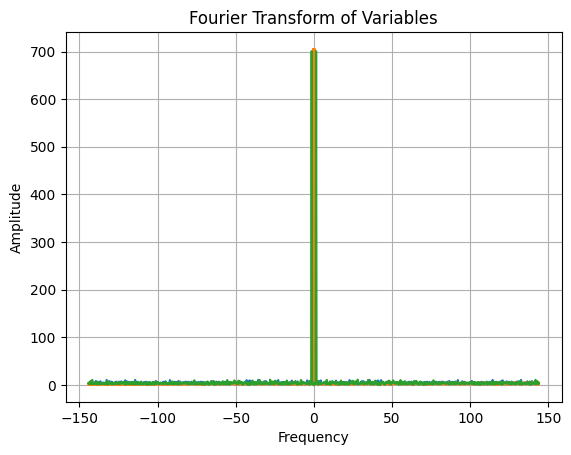

In [ ]:
#Fourier transformation
import matplotlib.pyplot as plt

fft_result_temp = np.fft.fft(ninja_data['temperature_normalized'])
fft_freq_temp = np.fft.fftfreq(len(ninja_data['temperature_normalized']), np.diff(ninja_data['time_normalized']).mean())

fft_result_pressure = np.fft.fft(ninja_data['pressure_normalized'])
fft_freq_pressure = np.fft.fftfreq(len(ninja_data['pressure_normalized']), np.diff(ninja_data['time_normalized']).mean())

fft_result_conc = np.fft.fft(ninja_data['chemical_concentration_normalized'])
fft_freq_conc = np.fft.fftfreq(len(ninja_data['chemical_concentration_normalized']), np.diff(ninja_data['time_normalized']).mean())

plt.plot(fft_freq_temp, np.abs(fft_result_temp))
plt.plot(fft_freq_pressure, np.abs(fft_result_pressure))
plt.plot(fft_freq_conc, np.abs(fft_result_conc))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of Variables')
plt.grid(True)

2. Statistical Analysis:

Goal: Extract statistical insights from the data.

Steps and Hints:

- Descriptive Statistics: Use pandas describe() function to get an overview of the data.
- Correlation Analysis: Calculate and interpret the correlation between variables using pandas corr() function.
- Inferential Statistics: Consider conducting hypothesis tests or regression analysis to draw deeper insights.

Tools: Explore scipy.stats for advanced statistical functions.

In [ ]:
ninja_data.describe()

,Time,Temperature,Pressure,Chemical Concentration,time_normalized,temperature_normalized,pressure_normalized,chemical_concentration_normalized
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,50.000000,19.977372,1013.033617,4.989754,5.684342e-17,1.136868e-16,-1.421085e-17,-4.121148e-16
std,28.910854,3.574943,14.203350,1.436505,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,0.000000,13.897407,990.284418,2.559310,-1.730320e+00,-1.701567e+00,-1.602480e+00,-1.692762e+00
25%,25.000000,16.386984,998.852247,3.576024,-8.651598e-01,-1.004823e+00,-9.989521e-01,-9.846385e-01
50%,50.000000,20.008666,1012.950967,4.970976,1.229485e-16,8.758279e-03,-5.821975e-03,-1.307840e-02
75%,75.000000,23.570373,1027.062114,6.398067,8.651598e-01,1.005554e+00,9.881835e-01,9.808653e-01
max,100.000000,26.030294,1035.471676,7.486763,1.730320e+00,1.693999e+00,1.580563e+00,1.739122e+00


In [ ]:
from scipy.stats import pearsonr

In [ ]:
corr_temp_pressure = pearsonr(ninja_data['temperature_normalized'], ninja_data['pressure_normalized'])
corr_temp_conc = pearsonr(ninja_data['temperature_normalized'], ninja_data['chemical_concentration_normalized'])
corr_pressure_conc = pearsonr(ninja_data['pressure_normalized'], ninja_data['chemical_concentration_normalized'])

print(f'Correlation between temperature and pressure: {corr_temp_pressure[0]}')
print(f'Correlation between temperature and chemical concentration: {corr_temp_conc[0]}')
print(f'Correlation between pressure and chemical concentration: {corr_pressure_conc[0]}')

Correlation between temperature and pressure: 0.007112292067251729
Correlation between temperature and chemical concentration: -0.003277070166048382
Correlation between pressure and chemical concentration: -0.0008626112448132438


The correlation between all three variables is around 0 so we can conclude that there is no correlation between these variables.

3. Data Visualization:

Goal: Create visual representations of your findings.

Steps and Hints:
- Heatmaps: Use heatmaps to visualize correlation matrices. This can be done with seaborn.
- Multi-dimensional Scatter Plots: Create scatter plots for pairs of variables to explore their relationships. seaborn’s pairplot is useful here.
- Fourier Transform Visualizations: Plot the amplitude vs. frequency graphs for the Fourier transformed data.
Tools: Utilize matplotlib and seaborn for creating plots.


<Axes: >

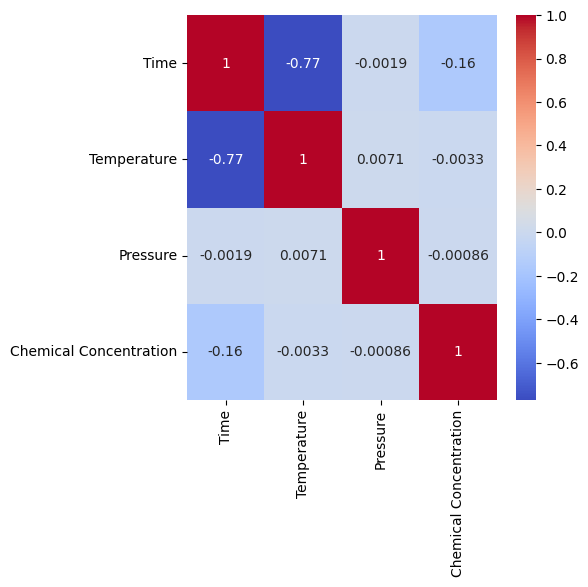

In [ ]:
import seaborn as sns

normalised_data = ninja_data[['time_normalized', 'temperature_normalized', 'pressure_normalized', 'chemical_concentration_normalized']]
corr = normalised_data.corr()
fig = plt.figure(figsize=(5, 5))
sns.heatmap(corr_non_normalized, annot=True, cmap='coolwarm')

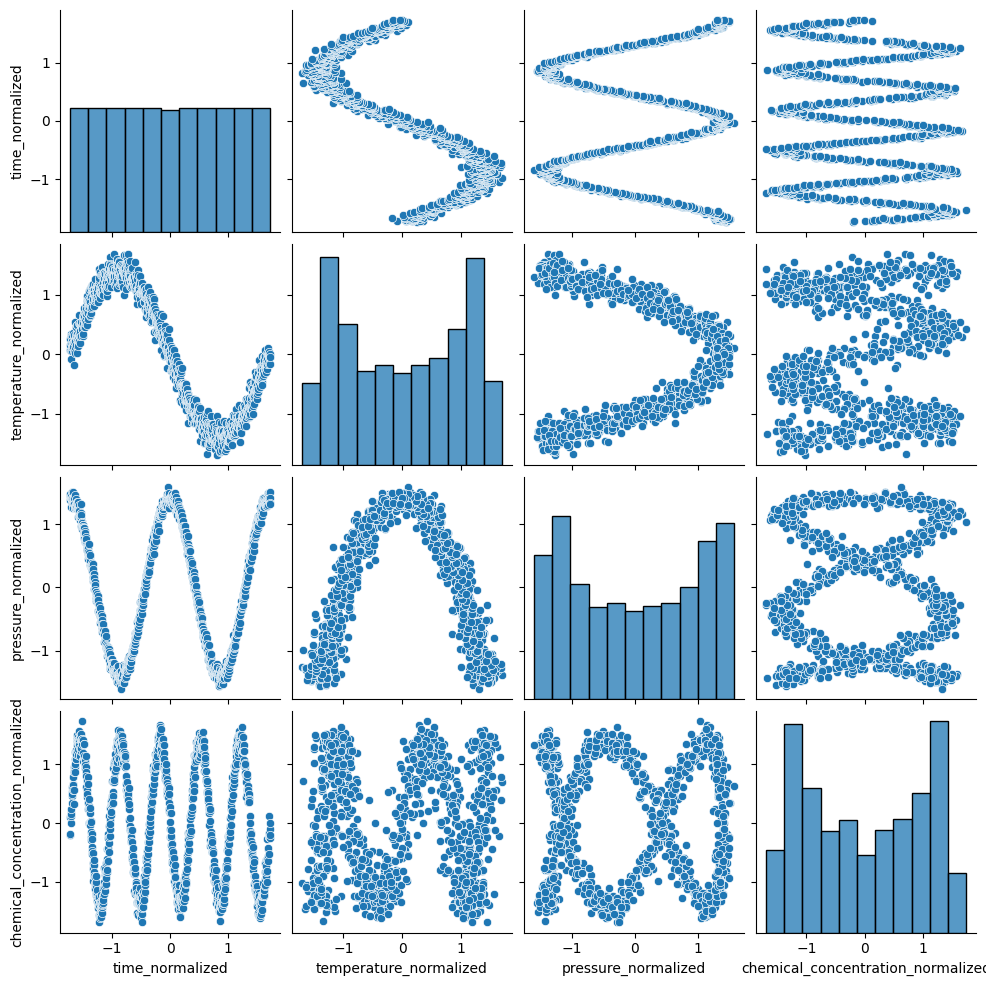

In [ ]:
sns.pairplot(normalised_data)

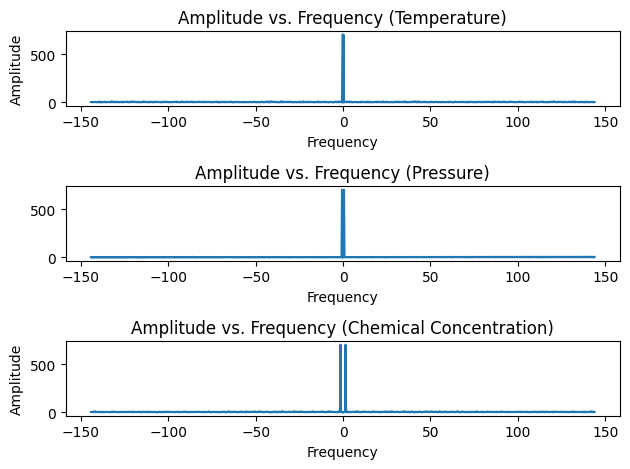

In [ ]:
amplitude_temp = np.abs(fft_result_temp)
amplitude_pressure = np.abs(fft_result_pressure)
amplitude_conc = np.abs(fft_result_conc)

plt.subplot(3, 1, 1)
plt.plot(fft_freq_temp, amplitude_temp)
plt.title('Amplitude vs. Frequency (Temperature)')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(fft_freq_pressure, amplitude_pressure)
plt.title('Amplitude vs. Frequency (Pressure)')
plt.xlabel('Frequency')

plt.subplot(3, 1, 3)
plt.plot(fft_freq_conc, amplitude_conc)
plt.title('Amplitude vs. Frequency (Chemical Concentration)')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.tight_layout()